In [1]:
import sys
sys.path.insert(0, '../src')

In [14]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_point, geom_text, xlab, ylab, ggtitle, geom_smooth
%matplotlib inline
from bicluster_preprocess import all_cols_otsu
import importlib
from scipy.stats import skew,kurtosis, pearsonr

In [10]:
exp_df = pd.read_csv("../data/processed/cortical_drimpute.csv",header=0,index_col=0)

In [11]:
lambda_2 = all_cols_otsu(exp_df.values.transpose())
lambda_2_df = pd.DataFrame(data=np.matrix(lambda_2).transpose(), index=exp_df.index.values, columns=["lambda_2"])

/home/mkleyman/anaconda3/lib/python3.6/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/home/mkleyman/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/home/mkleyman/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/home/mkleyman/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/home/mkleyman/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The 

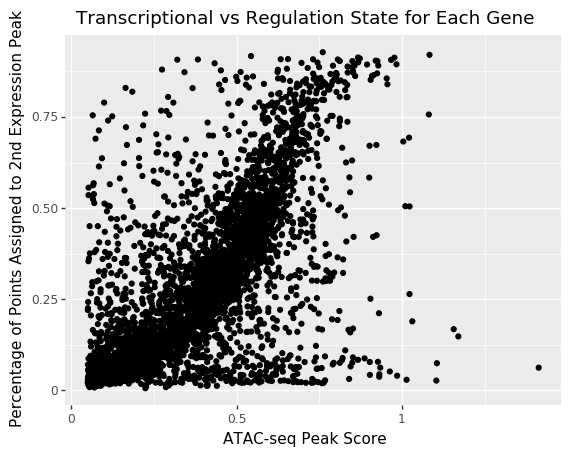

<ggplot: (8733220577768)>

In [21]:
atac_file = "../data/raw/cortical_scored_promoters_kb2_max.csv"
atac_df = pd.read_csv(atac_file,header=0,index_col=0)
gene_inter =  np.intersect1d(atac_df.index, lambda_2_df.index)
atac_df = atac_df.loc[gene_inter]
atac_df['lambda_2'] = lambda_2_df.loc[gene_inter][["lambda_2"]]
atac_df = atac_df.query('score>0.5')
atac_df["score"] = atac_df["score"]/10.0

ggplot(atac_df ,aes(x="score",y="lambda_2"))+geom_point()+ylab("Percentage of Points Assigned to 2nd Expression Peak")+xlab("ATAC-seq Peak Score")+ggtitle("Transcriptional vs Regulation State for Each Gene") 

In [29]:
exp_mat =exp_df.transpose()[atac_df.index].values

In [32]:
epi_vec = atac_df["score"].values
epi_vec = np.asarray([.95 if val>.95 else val for val in epi_vec])

In [33]:
exp_mat.shape

(1809, 3984)

In [36]:
import bicluster_em

In [37]:
best_cell_assignments, best_gene_assignments, best_aic, best_k =  bicluster_em.multi_k_em(exp_mat,epi_vec,range(5,15),.3,1000,"AIC")

initial e-step
initial clustering
0
optmizing j
optimizing i
-62395914.517180406
1
optmizing j
optimizing i
-57012911.873132885
2
optmizing j
optimizing i
-55653587.16667659
3
optmizing j
optimizing i
-54784310.549987786
4
optmizing j
optimizing i
-54420109.99425885
5
optmizing j
optimizing i
-54250074.626655094
6
optmizing j
optimizing i
-54151690.106763616
7
optmizing j
optimizing i
-54088814.51913306
8
optmizing j
optimizing i
-54020442.467404604
9
optmizing j
optimizing i
-53989000.50302251
10
optmizing j
optimizing i
-53947852.70822978
11
optmizing j
optimizing i
-53924822.81864289
12
optmizing j
optimizing i
-53915575.28073844
13
optmizing j
optimizing i
-53913893.32530272
14
optmizing j
optimizing i
-53913149.43681288
15
optmizing j
optimizing i
-53913149.43681288
 e-step
m-step
0
optmizing j
optimizing i


KeyboardInterrupt: 